In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder #To convert Categorical variables to numerical variables in pre processing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris_data=pd.read_csv("Iris.csv")

In [ ]:
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Checking for null values in a dataset
iris_data.isnull().values.any()

np.False_

<Axes: xlabel='count', ylabel='Species'>

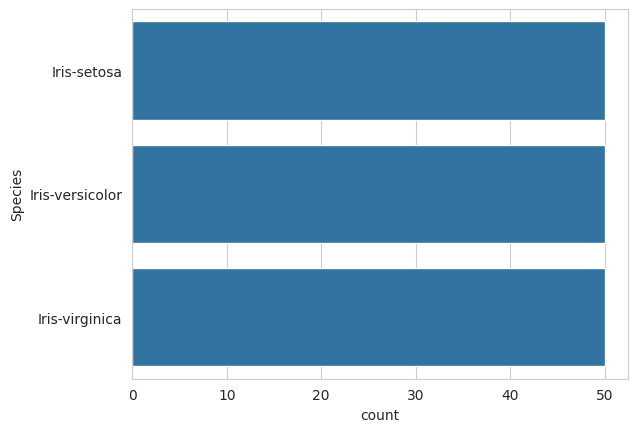

In [ ]:
sns.countplot(iris_data['Species'])

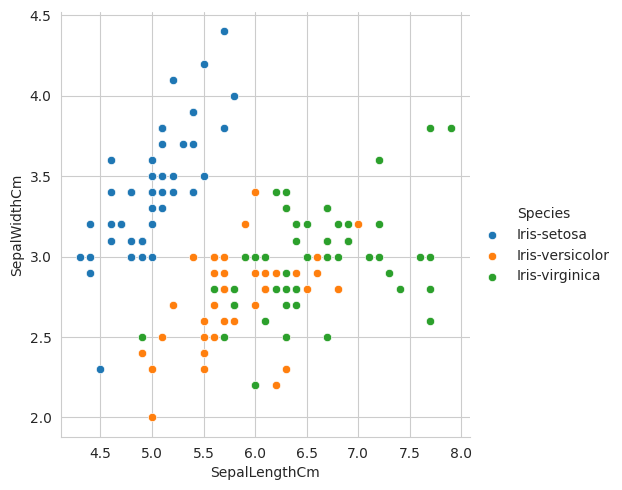

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='Species', height=5).map(sns.scatterplot, 'SepalLengthCm', 'SepalWidthCm').add_legend()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


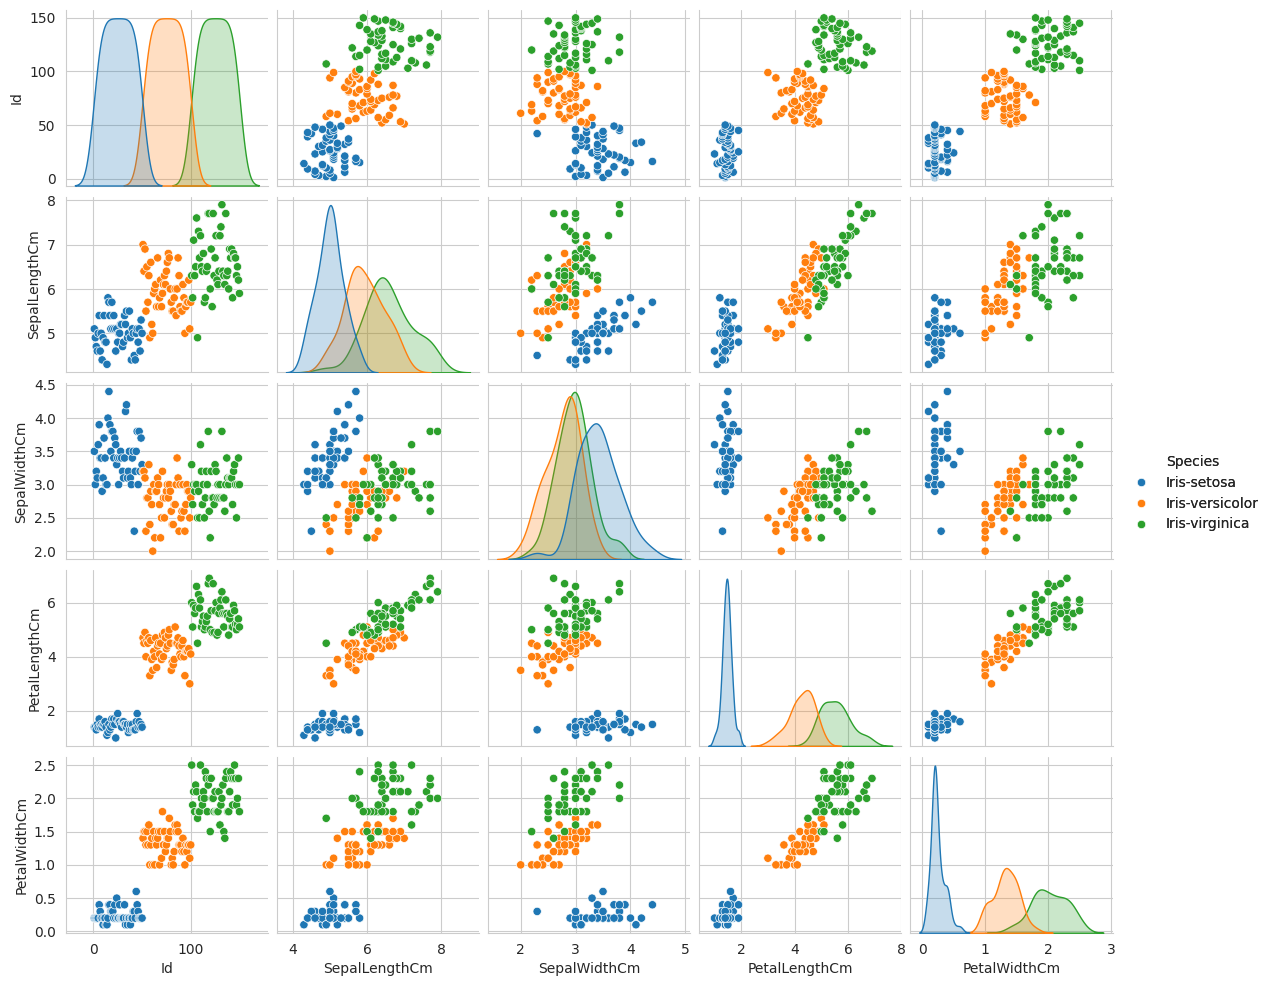

In [ ]:
sns.pairplot(iris_data, hue='Species', size=2).add_legend()

In [ ]:
# Remove the Id column
if 'Id' in iris_data.columns:
    iris_data = iris_data.drop('Id', axis=1)

# Assign proper column names according to the requirements
new_column_names = {
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}
iris_data = iris_data.rename(columns=new_column_names)

# Encode the species column numerically using LabelEncoder.
# Ensure 'le' object is available and fitted for later use (e.g., classification report)
le = LabelEncoder()
iris_data['species'] = le.fit_transform(iris_data['species'])

# Define features and target
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_data['species'].values

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:
import time

#K value selection
k_values = [3, 5, 7]
knn_accuracies = [] # accuracy recording for every k value
knn_training_times = [] # To record training time for each k value

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)

   # Training time
  start_time = time.time()
  knn.fit(X_train_scaled, y_train)
  training_time = time.time() - start_time
  knn_training_times.append(training_time)

  # Prediction and accuracy
  y_pred = knn.predict(X_test_scaled)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  knn_accuracies.append(accuracy)

  print(f"k = {k}: Accuracy = {accuracy:}, Training Time = {training_time:.4f} seconds")



k = 3: Accuracy = 0.9111111111111111, Training Time = 0.0018 seconds
k = 5: Accuracy = 0.9111111111111111, Training Time = 0.0018 seconds
k = 7: Accuracy = 0.9333333333333333, Training Time = 0.0013 seconds


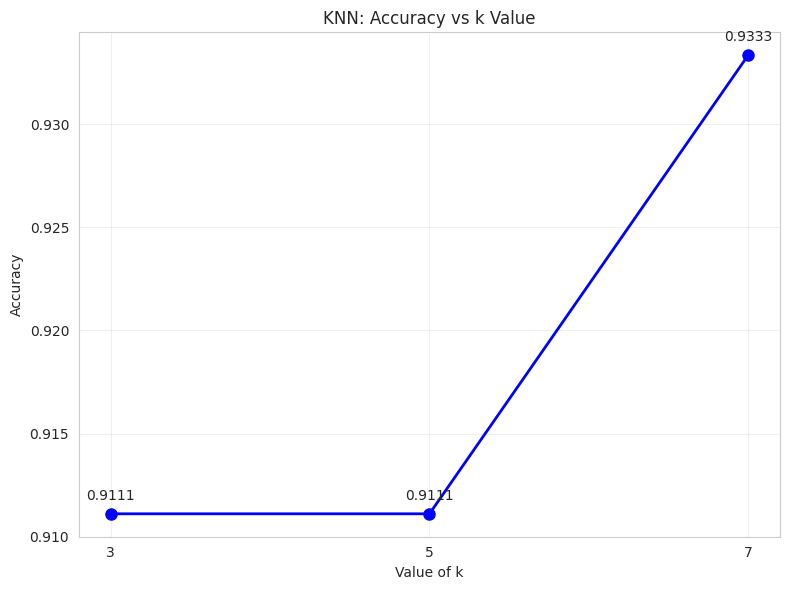

In [ ]:
# Plot accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k Value')
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

# Annotate points with accuracy values
for i, (k, acc) in enumerate(zip(k_values, knn_accuracies)):
    plt.annotate(f'{acc:.4f}', (k, acc), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Store KNN results for comparison
knn_results = {
    'k_values': k_values,
    'accuracies': knn_accuracies,
    'training_times': knn_training_times
}

In [ ]:
#Decision Tree Classifier Implementation
from sklearn.tree import DecisionTreeClassifier
start_time=time.time()
decision_tree_model= DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_model.fit(X_train, y_train)
dt_training_time=time.time()-start_time
print(f"Model trained in {dt_training_time} seconds")

Model trained in 0.005059957504272461 seconds


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Making Predictions on training set
dt_pred_train=decision_tree_model.predict(X_train)
dt_train_accuracy=metrics.accuracy_score(y_train, dt_pred_train)
#Make predictions on Testing set
dt_pred_test=decision_tree_model.predict(X_test)
dt_test_accuracy=metrics.accuracy_score(y_test, dt_pred_test)
#Calculating other metrics
dt_precision= precision_score(y_test, dt_pred_test, average='weighted')
dt_recall= recall_score(y_test, dt_pred_test, average='weighted')
dt_f1_score=f1_score(y_test,dt_pred_test, average='weighted')

print("Decision Tree Classifier Metrics:")
print(f"Training Accuracy: {dt_train_accuracy:.4f} ({dt_train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {dt_test_accuracy:.4f} ({dt_test_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1_score:.4f}")

Decision Tree Classifier Metrics:
Training Accuracy: 1.0000 (100.00%)
Testing Accuracy: 0.8889 (88.89%)
Precision: 0.8899
Recall: 0.8889
F1 Score: 0.8888


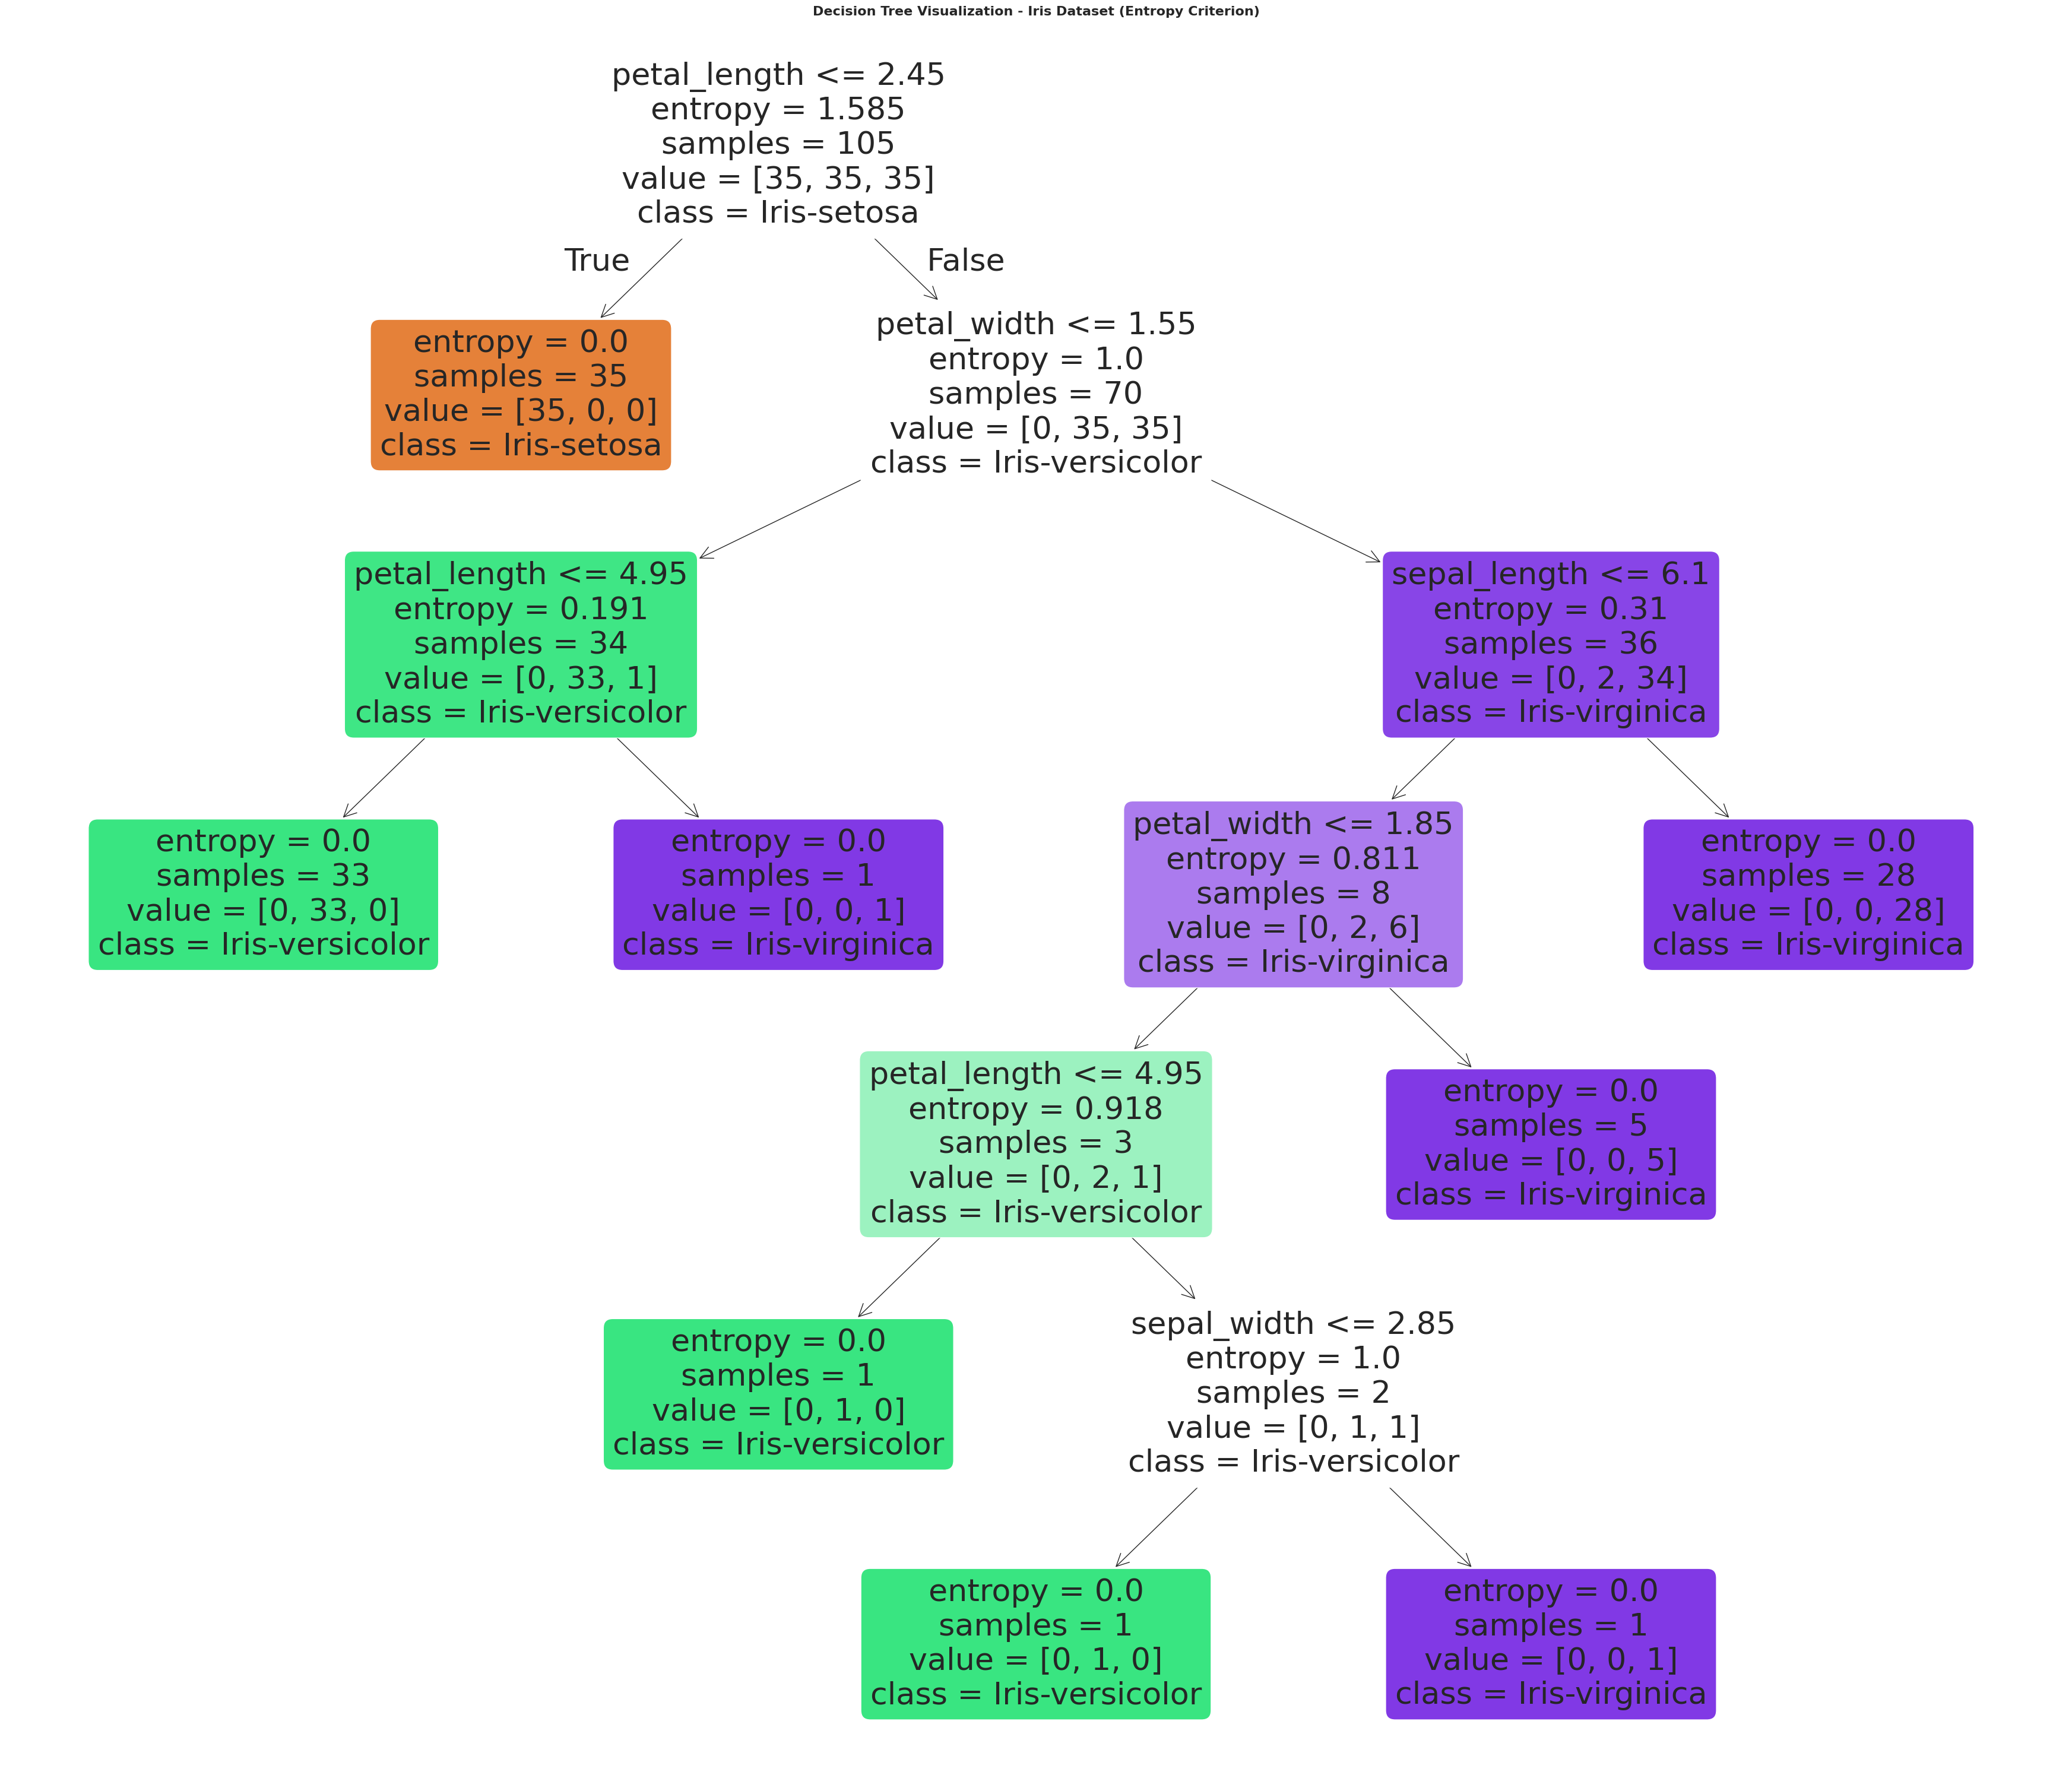

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt # Ensure plt is imported

#Visualizing Tree
fig, ax = plt.subplots(figsize=(35,30)) # Create a figure and axes explicitly
plot_tree(decision_tree_model, feature_names=["sepal_length", "sepal_width", "petal_length", "petal_width"], class_names=le.classes_, filled=True, rounded=True, impurity=True, ax=ax) # Add impurity=True
plt.title("Decision Tree Visualization - Iris Dataset (Entropy Criterion)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("Decision_Tree_Entropy.png", dpi=300, bbox_inches="tight")
plt.show()

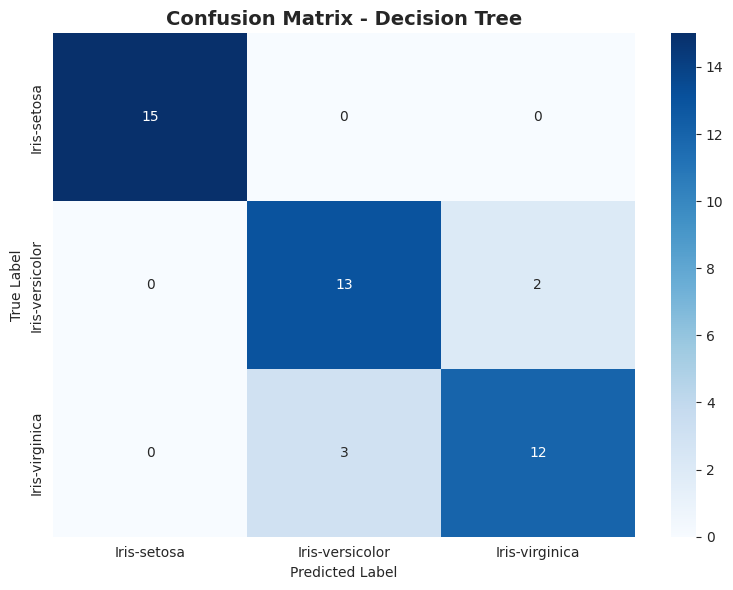

In [ ]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
# Train KNN model with k=7 (best performing)
best_knn = KNeighborsClassifier(n_neighbors=7)
best_knn.fit(X_train_scaled, y_train)
knn_pred_test = best_knn.predict(X_test_scaled)
knn_pred_train = best_knn.predict(X_train_scaled)

# Get training time for k=7 (from earlier results)
knn_training_time = knn_training_times[2]  # Index 2 corresponds to k=7

# Calculate KNN metrics
knn_train_accuracy = accuracy_score(y_train, knn_pred_train)
knn_test_accuracy = knn_accuracies[2]  # k=7 accuracy from earlier
knn_precision = precision_score(y_test, knn_pred_test, average='weighted')
knn_recall = recall_score(y_test, knn_pred_test, average='weighted')
knn_f1_score = f1_score(y_test, knn_pred_test, average='weighted')

print(f"\nK-Nearest Neighbors Classifier Metrics (k=7):")
print(f"Training Accuracy: {knn_train_accuracy:.4f} ({knn_train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {knn_test_accuracy:.4f} ({knn_test_accuracy*100:.2f}%)")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1_score:.4f}")






K-Nearest Neighbors Classifier Metrics (k=7):
Training Accuracy: 0.9810 (98.10%)
Testing Accuracy: 0.9333 (93.33%)
Precision: 0.9444
Recall: 0.9333
F1 Score: 0.9327


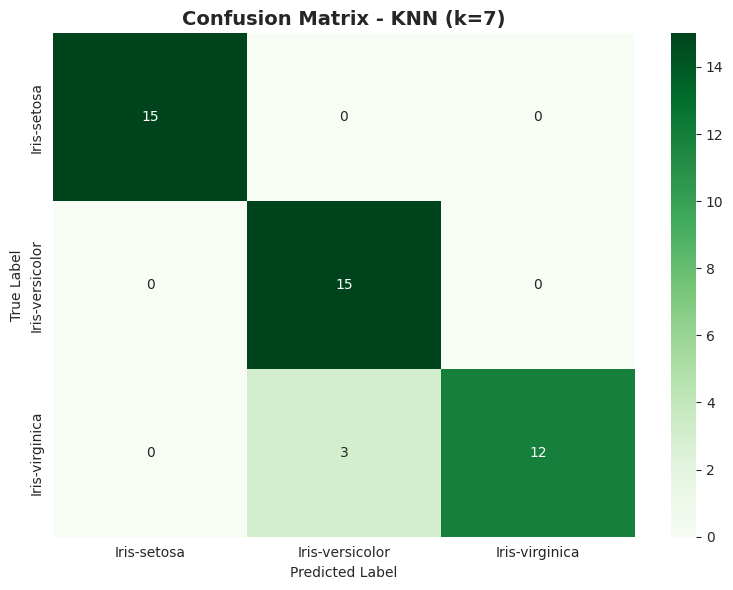

In [ ]:
#CONFUSION MATRIX FOR KNN (k=7)

cm_knn = confusion_matrix(y_test, knn_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN (k=7)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig("Confusion_Matrix_KNN_k7.png", dpi=300, bbox_inches="tight")
plt.show()



CLASSIFICATION REPORT - DECISION TREE
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.81      0.87      0.84        15
 Iris-virginica       0.86      0.80      0.83        15

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45


CLASSIFICATION REPORT - KNN (k=7)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45


COMPARISON TABLE: DECISION TREE VS KNN
    Algorithm Training Accuracy Testing Accuracy Precision Recall F1-Score Trainin

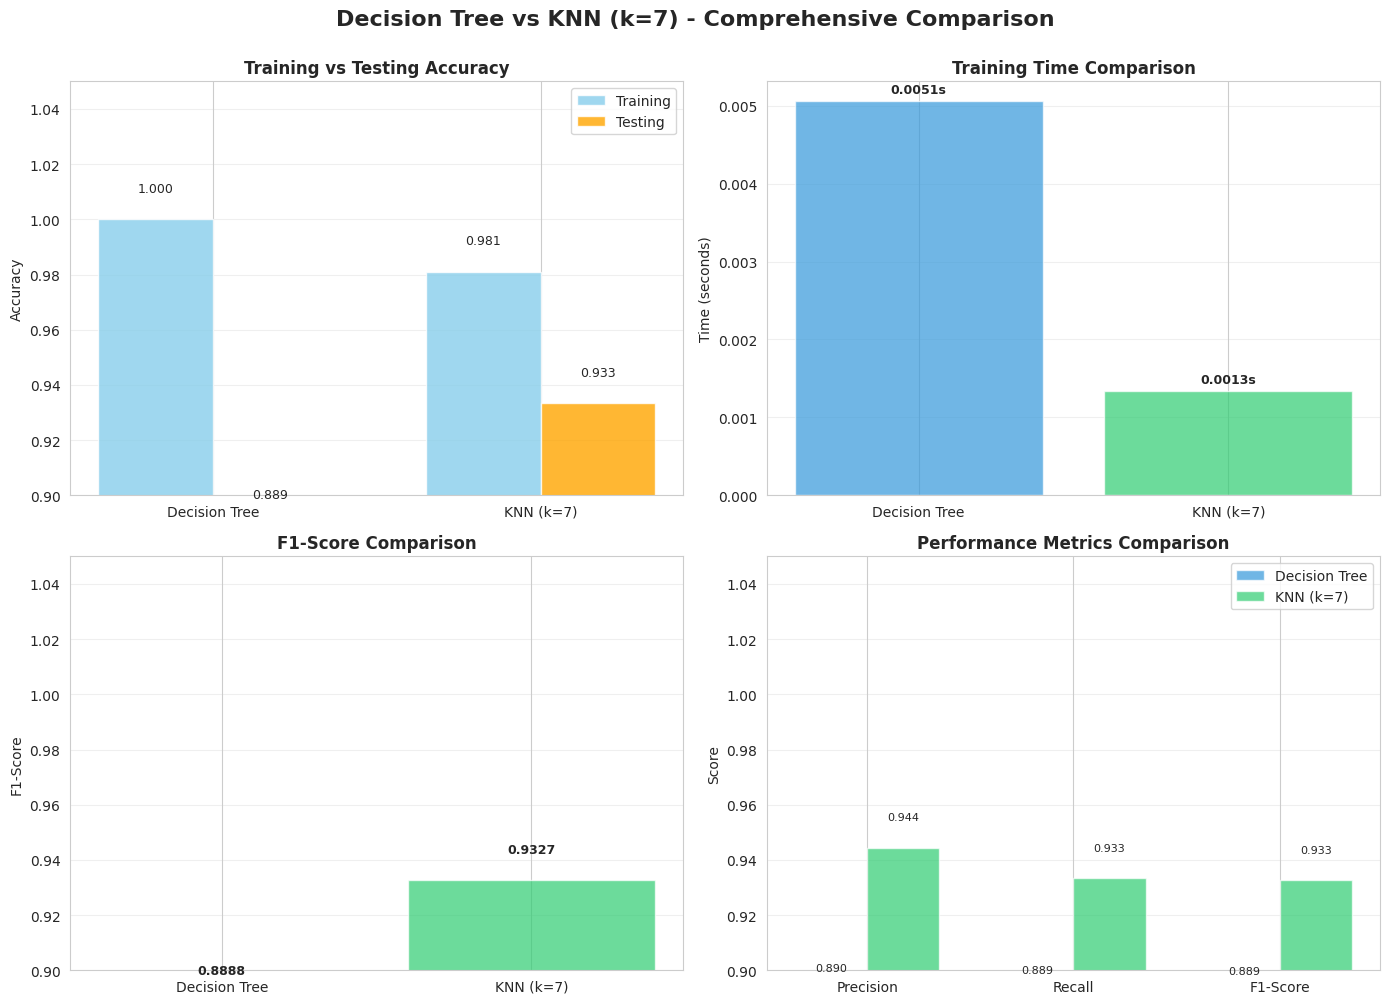


SUMMARY INSIGHTS
Better Accuracy: KNN (k=7) (+4.44%)
Faster Training: KNN (k=7) (0.0037s faster)
Most Interpretable: Decision Tree (can visualize decision rules)


In [ ]:
# CLASSIFICATION REPORTS

from sklearn.metrics import classification_report

print("\n" + "="*70)
print("CLASSIFICATION REPORT - DECISION TREE")
print("="*70)
print(classification_report(y_test, dt_pred_test, target_names=le.classes_))

print("\n" + "="*70)
print("CLASSIFICATION REPORT - KNN (k=7)")
print("="*70)
print(classification_report(y_test, knn_pred_test, target_names=le.classes_))

# ============================================
# 4. COMPARISON TABLE
# ============================================
comparison_df = pd.DataFrame({
    'Algorithm': ['Decision Tree', 'KNN (k=7)'],
    'Training Accuracy': [f"{dt_train_accuracy:.4f}", f"{knn_train_accuracy:.4f}"],
    'Testing Accuracy': [f"{dt_test_accuracy:.4f}", f"{knn_test_accuracy:.4f}"],
    'Precision': [f"{dt_precision:.4f}", f"{knn_precision:.4f}"],
    'Recall': [f"{dt_recall:.4f}", f"{knn_recall:.4f}"],
    'F1-Score': [f"{dt_f1_score:.4f}", f"{knn_f1_score:.4f}"],
    'Training Time (s)': [f"{dt_training_time:.4f}", f"{knn_training_time:.4f}"],
    'Interpretability': ['High (Visual tree)', 'Low (Black box)']
})

print("\n" + "="*100)
print("COMPARISON TABLE: DECISION TREE VS KNN")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)

# Save comparison table to CSV
comparison_df.to_csv("DT_vs_KNN_Comparison.csv", index=False)
print("\nComparison table saved to 'DT_vs_KNN_Comparison.csv'")

# ============================================
# 5. VISUAL COMPARISON CHARTS
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

algorithms = ['Decision Tree', 'KNN (k=7)']

# 1. Accuracy comparison (Training vs Testing)
x = np.arange(len(algorithms))
width = 0.35
train_acc = [dt_train_accuracy, knn_train_accuracy]
test_acc = [dt_test_accuracy, knn_test_accuracy]

axes[0, 0].bar(x - width/2, train_acc, width, label='Training', color='skyblue', alpha=0.8)
axes[0, 0].bar(x + width/2, test_acc, width, label='Testing', color='orange', alpha=0.8)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Training vs Testing Accuracy', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(algorithms)
axes[0, 0].legend()
axes[0, 0].set_ylim([0.9, 1.05])
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (train, test) in enumerate(zip(train_acc, test_acc)):
    axes[0, 0].text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', fontsize=9)
    axes[0, 0].text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', fontsize=9)

# 2. Training time comparison
training_times = [dt_training_time, knn_training_time]
bars = axes[0, 1].bar(algorithms, training_times, color=['#3498db', '#2ecc71'], alpha=0.7)
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].set_title('Training Time Comparison', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

for i, (bar, v) in enumerate(zip(bars, training_times)):
    axes[0, 1].text(i, v + max(training_times)*0.02, f'{v:.4f}s',
                    ha='center', fontweight='bold', fontsize=9)

# 3. F1-Score comparison
f1_scores = [dt_f1_score, knn_f1_score]
bars = axes[1, 0].bar(algorithms, f1_scores, color=['#3498db', '#2ecc71'], alpha=0.7)
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_title('F1-Score Comparison', fontweight='bold')
axes[1, 0].set_ylim([0.9, 1.05])
axes[1, 0].grid(axis='y', alpha=0.3)

for i, (bar, v) in enumerate(zip(bars, f1_scores)):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=9)

# 4. All metrics comparison
metrics_names = ['Precision', 'Recall', 'F1-Score']
dt_metrics = [dt_precision, dt_recall, dt_f1_score]
knn_metrics = [knn_precision, knn_recall, knn_f1_score]

x = np.arange(len(metrics_names))
axes[1, 1].bar(x - width/2, dt_metrics, width, label='Decision Tree',
               color='#3498db', alpha=0.7)
axes[1, 1].bar(x + width/2, knn_metrics, width, label='KNN (k=7)',
               color='#2ecc71', alpha=0.7)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Performance Metrics Comparison', fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].legend()
axes[1, 1].set_ylim([0.9, 1.05])
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (dt_m, knn_m) in enumerate(zip(dt_metrics, knn_metrics)):
    axes[1, 1].text(i - width/2, dt_m + 0.01, f'{dt_m:.3f}', ha='center', fontsize=8)
    axes[1, 1].text(i + width/2, knn_m + 0.01, f'{knn_m:.3f}', ha='center', fontsize=8)

plt.suptitle('Decision Tree vs KNN (k=7) - Comprehensive Comparison',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig("DT_vs_KNN_Visual_Comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# SUMMARY INSIGHTS

print("\n" + "="*70)
print("SUMMARY INSIGHTS")
print("="*70)

if dt_test_accuracy > knn_test_accuracy:
    better_model = "Decision Tree"
    accuracy_diff = (dt_test_accuracy - knn_test_accuracy) * 100
else:
    better_model = "KNN (k=7)"
    accuracy_diff = (knn_test_accuracy - dt_test_accuracy) * 100

print(f"Better Accuracy: {better_model} (+{accuracy_diff:.2f}%)")

if dt_training_time < knn_training_time:
    faster_model = "Decision Tree"
    time_diff = knn_training_time - dt_training_time
else:
    faster_model = "KNN (k=7)"
    time_diff = dt_training_time - knn_training_time

print(f"Faster Training: {faster_model} ({time_diff:.4f}s faster)")
print(f"Most Interpretable: Decision Tree (can visualize decision rules)")
print("="*70)
